<a href="https://colab.research.google.com/github/rajat1911996sharma/Linear-Regression-Application/blob/main/medical_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Gathering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Data Wrangling

In [7]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [9]:
df['is_male'] = df['sex'].map({'female':0,'male':1})

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,is_male
0,19,female,27.900,0,1,southwest,16884.92400,0
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,1
4,32,male,28.880,0,0,northwest,3866.85520,1


In [11]:
df.drop('sex',axis=1,inplace=True)

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
region_dummies = pd.get_dummies(df['region'],drop_first=True)

In [14]:
df = pd.concat([df.drop('region',axis=1),region_dummies],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   smoker     1338 non-null   int64  
 4   charges    1338 non-null   float64
 5   is_male    1338 non-null   int64  
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


##Data Visualization

In [16]:
df.corr()

,age,bmi,children,smoker,charges,is_male,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,-0.025019,0.299008,-0.020856,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,0.046371,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.007673,0.067998,0.017163,0.024806,-0.023066,0.021914
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,0.076185,-0.036945,0.068498,-0.036945
charges,0.299008,0.198341,0.067998,0.787251,1.000000,0.057292,-0.039905,0.073982,-0.043210
is_male,-0.020856,0.046371,0.017163,0.076185,0.057292,1.000000,-0.011156,0.017117,-0.004184
northwest,-0.000407,-0.135996,0.024806,-0.036945,-0.039905,-0.011156,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.068498,0.073982,0.017117,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.036945,-0.043210,-0.004184,-0.320829,-0.346265,1.000000


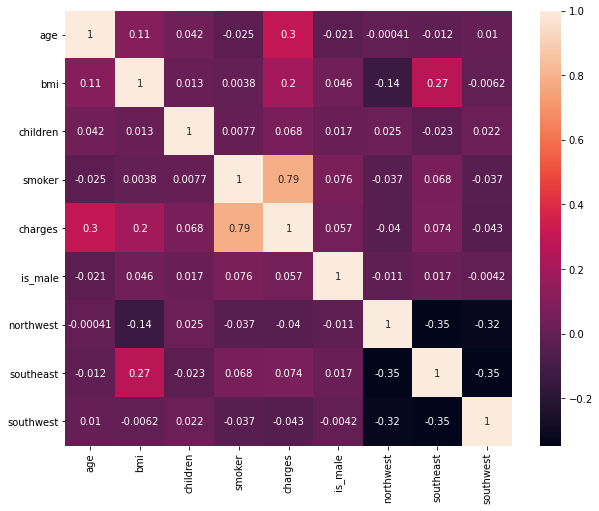

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Age, BMI and Smoker seems to be corelated for medical charges.

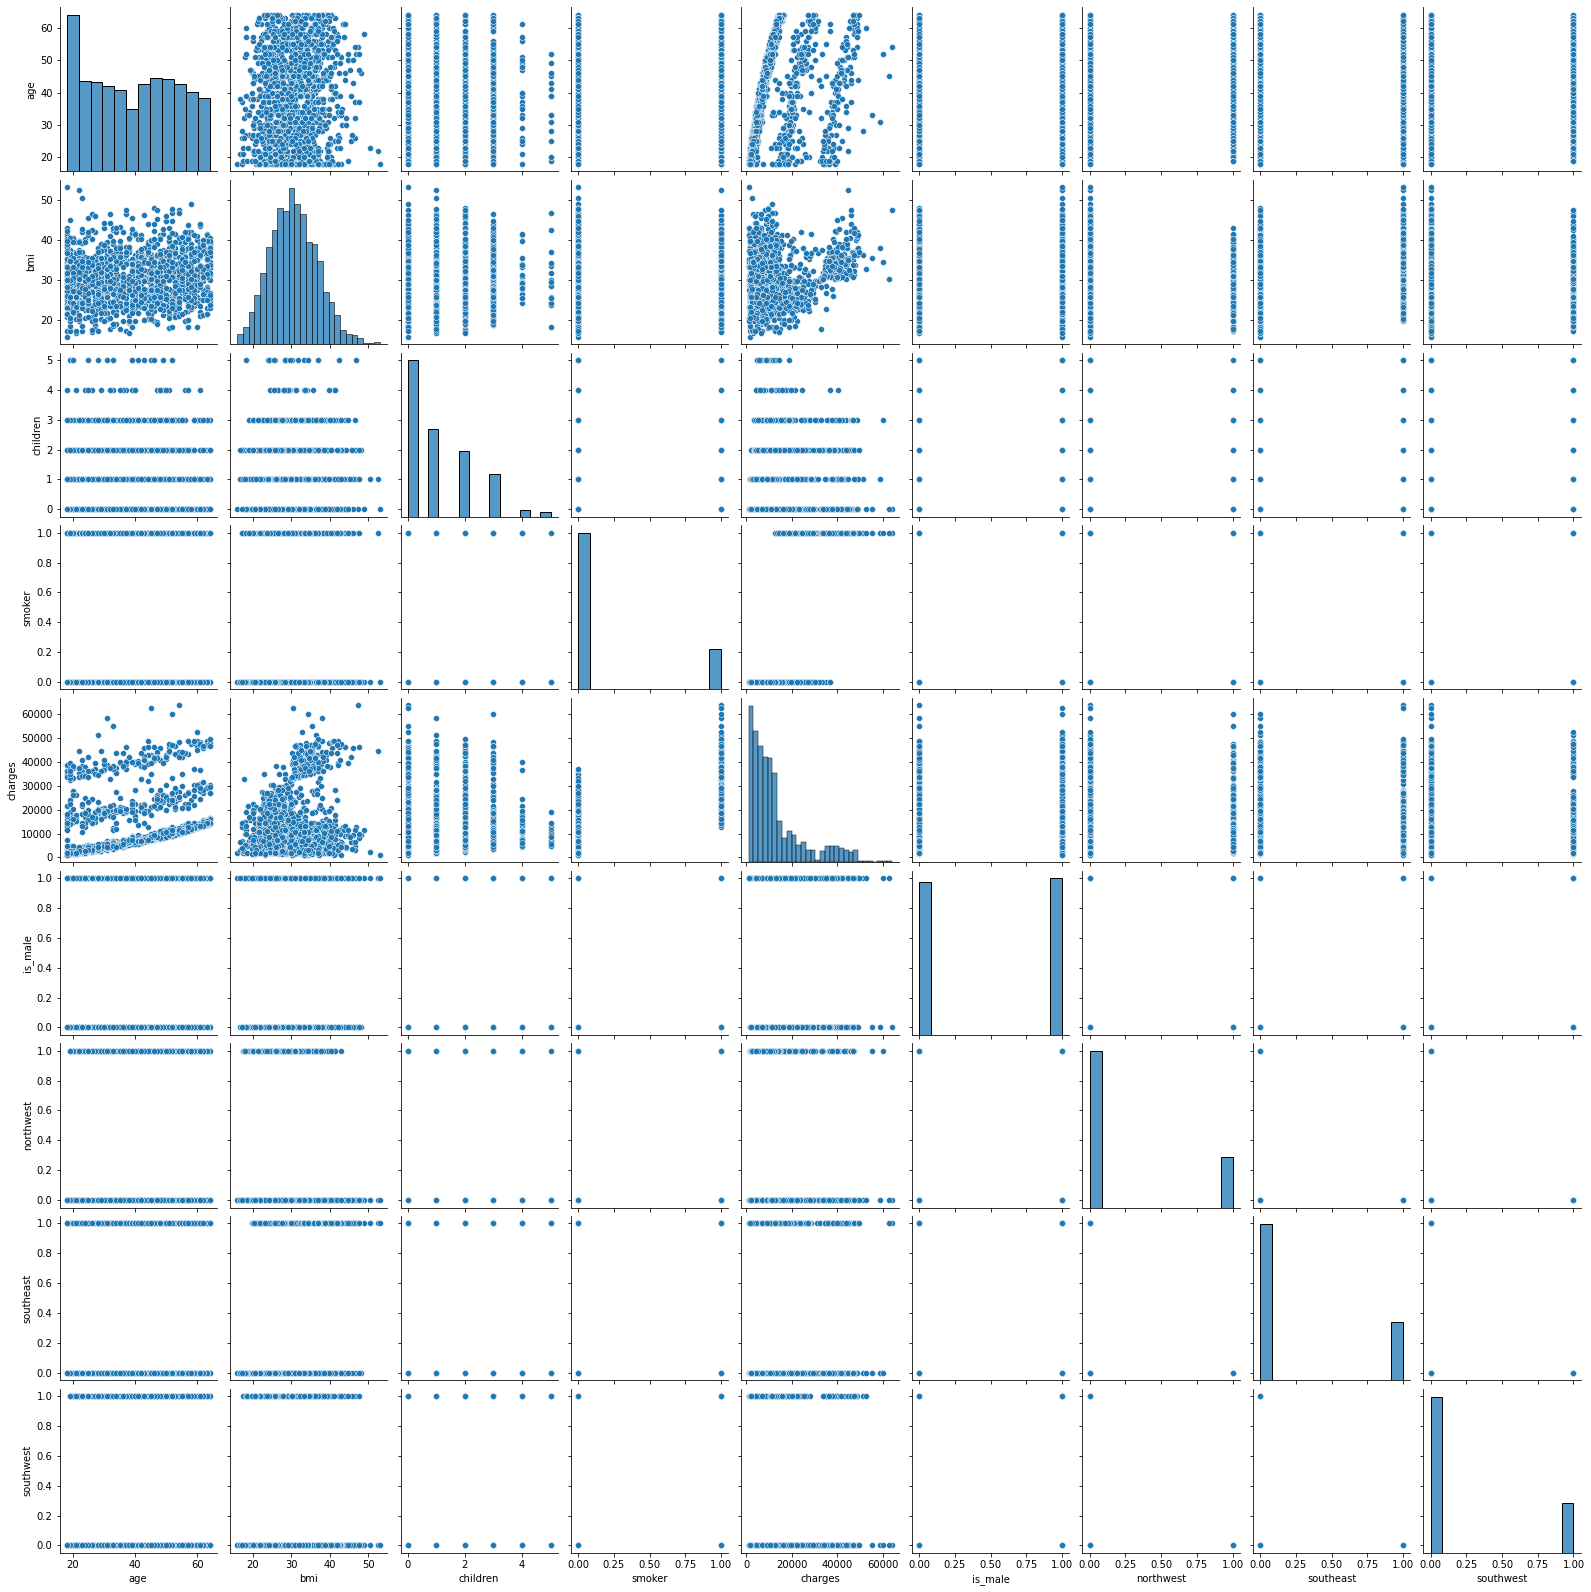

In [18]:
sns.pairplot(df)

##Part 1

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['age','bmi','smoker']]
y = df['charges']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred_lm = lm.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print(mean_squared_error(y_test,pred_lm))

33942226.593778715


In [28]:
np.sqrt(mean_squared_error(y_test,pred_lm))

5825.995759849016

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


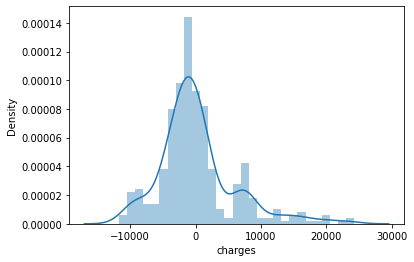

In [29]:
sns.distplot(y_test-pred_lm)

In [30]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [31]:
r2_score(y_test,pred_lm)

0.7583790612051051

A very good fit with the data

In [32]:
X_test.iloc[0]

age       38.00
bmi       37.05
smoker     0.00
Name: 44, dtype: float64

In [33]:
charges_lm = lm.predict(X_test.iloc[0].values.reshape(1,-1))
print(charges_lm)

[10379.94129046]


In [34]:
y_test.iloc[0]

6079.6715

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
rfr_pred = rfr.predict(X_test)

In [38]:
print(np.sqrt(mean_squared_error(y_test,rfr_pred)))
r2_score(y_test,rfr_pred)

5377.636593022524


0.7941375487522135

In [39]:
charges_rfr = rfr.predict(X_test.iloc[0].values.reshape(1,-1))
print(charges_rfr)

[6977.8416627]


##Part 2

In [40]:
X = df.drop('charges',axis=1)
y = df['charges']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [42]:
lm1 = LinearRegression()

In [43]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
pred_lm1 = lm1.predict(X_test)

In [45]:
print(np.sqrt(mean_squared_error(y_test,pred_lm1)))

5803.762514494928


In [46]:
r2_score(y_test,pred_lm1)

0.7602196966782769

In [47]:
charges_lm1 = lm1.predict(X_test.iloc[0].values.reshape(1,-1))
print(charges_lm1)

[10759.44191143]


In [48]:
rfr1 = RandomForestRegressor()
rfr1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
rfr1_pred = rfr1.predict(X_test)

In [50]:
print(np.sqrt(mean_squared_error(y_test,rfr1_pred)))
r2_score(y_test,rfr1_pred)

4988.94281550695


0.8228213897170986

In [51]:
charges_rfr1 = rfr1.predict(X_test.iloc[0].values.reshape(1,-1))
print(charges_rfr1)

[7916.8132175]


#Streamlit and pymgrok

##writing app to Colab Sandbox

In [57]:
pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-5.0.0-cp36-none-any.whl size=18780 sha256=a047ac67c690a4332f73c55b6b7f9fba7b54d3c34ed60f1f103e2009f36f5fcd
  Stored in directory: /root/.cache/pip/wheels/95/df/23/af8dde08c3fcdc7b966adcacef48ab29aa3b0b1860df5d2b79
Successfully built pyngrok


In [58]:
%%writefile med_charges.py
import streamlit as st
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)


def main():
	st.title("Awesome Streamlit for ML")
	st.subheader("How to run streamlit from colab")


	menu = ["Home","About"]
	choice = st.sidebar.selectbox('Menu',menu)
	if choice == 'Home':
		st.subheader("Streamlit From Colab")	



if __name__ == '__main__':
	main()

Overwriting med_charges.py


##Installing requirements file

In [62]:
!pip install -r requirements_colab.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements_colab.txt'


##starting the app

In [59]:
!streamlit run med_charges.py &>/dev/null&

##creating a secure tunnel with Pyngrok

In [60]:
from pyngrok import ngrok

In [61]:
#Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://51e52e62d587.ngrok.io" -> "http://localhost:80">

## shutting down your app

In [ ]:
!pgrep streamlit

5109
5210
5244
5345
5381
5417
5461


#Kill the process

In [ ]:
ngrok.kill()

2020-11-28 21:47:40.584 INFO    pyngrok.process: Killing ngrok process: 5473
